#ROSSMAN SALES - Ciclo 01


## INTRODUÇÃO (TODO)



## RESUMO (TODO)

#0.0. IMPORTAÇÃO DOS DADOS E BIBLIOTECAS

## 0.1 Importação das bibliotecas

In [1]:
#importando bibliotecas
  
  # Importação e manipulação de dados
import pandas as pd
import numpy  as np

  # Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns

  # Feature Engineering
from   IPython.display        import Image
import datetime
import math

  # Feature Selection
from sklearn.ensemble         import RandomForestRegressor
from boruta                   import BorutaPy

  # Preparação de dados
from sklearn.preprocessing    import RobustScaler, MinMaxScaler, LabelEncoder

  # Modelagem
import xgboost as xgb
from sklearn.linear_model     import LinearRegression, Lasso

  # Resultados de modelos
from sklearn.metrics          import mean_absolute_error, mean_squared_error
  
  # Validação
from sklearn.model_selection  import cross_validate
from sklearn.model_selection  import KFold

  # Otimização
import random
import warnings
warnings.filterwarnings( 'ignore')

## Funções Auxiliares

In [2]:
def mean_absolute_percentage_error(y, y_pred):
  return np.mean(np.abs((y - y_pred) / y))

In [3]:
def ml_error( model_name, y, y_pred):
  mae = mean_absolute_error(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  rmse = np.sqrt (mean_squared_error(y, y_pred))

  return pd.DataFrame({'Model Name': model_name,
                       'MAE' : mae,
                       'MAPE': mape,
                       'RMSE': rmse}, index=[0])

### Versões

In [4]:
import sys
print('Versão do Python:', sys.version)
print('Versão do numpy: %s' % np.__version__)
print('Versão do pandas: %s' % pd.__version__)
print('Versão do seaborn: %s' % sns.__version__)

Versão do Python: 3.8.5 (default, Aug  5 2020, 09:44:06) [MSC v.1916 64 bit (AMD64)]
Versão do numpy: 1.19.1
Versão do pandas: 1.1.1
Versão do seaborn: 0.10.1


## 0.2 Importação dos dados

In [6]:
# Endereço do conjunto de dados na pasta do google drive
store_csv_path        = 'rossmann-store-sales200805/store.csv'
test_csv_path         = 'rossmann-store-sales200805/test.csv'
train_csv_path        = 'rossmann-store-sales200805/train.csv'
sample_sub_csv_path   = 'rossmann-store-sales200805/sample_submission.csv'


In [7]:
# Carregando dados para dataframes
df_stores_raw = pd.read_csv(store_csv_path, low_memory=False)
df_train_raw = pd.read_csv(train_csv_path, low_memory=False)
df_test_raw = pd.read_csv(test_csv_path, low_memory=False)

df_stores_raw.name='store_df_raw'
df_train_raw.name='train_df_raw'
df_test_raw.name='true_df_raw'


## 0.3. Merge (Join)

In [8]:
df_raw = pd.merge(df_train_raw, df_stores_raw, how='left', on='Store')

In [9]:
df_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0. DESCRIÇÃO DOS DADOS 

## 1.1 Dimensões dos dados (Data Shape)

In [10]:
#cópia para segurança
df1 = df_raw.copy()

In [11]:
#Informações gerais dos dados
print('\n', '===Descrição Geral===')
print('Numero de registros: {}'.format(df_raw.shape[0]))
print('Numero de variaveis: {}'.format(df_raw.shape[1]))
print('\n', '===Lista de Variáveis===')
print(*df_raw.columns.to_list(), sep='\n')
print('\n', '===Variável Alvo===')
print('Sales')


 ===Descrição Geral===
Numero de registros: 1017209
Numero de variaveis: 18

 ===Lista de Variáveis===
Store
DayOfWeek
Date
Sales
Customers
Open
Promo
StateHoliday
SchoolHoliday
StoreType
Assortment
CompetitionDistance
CompetitionOpenSinceMonth
CompetitionOpenSinceYear
Promo2
Promo2SinceWeek
Promo2SinceYear
PromoInterval

 ===Variável Alvo===
Sales


### De acordo com a documentação do dataset, tem-se as seguintes variáveis com suas respectivas descrições:

*  Id - an Id that represents a (Store, Date) duple within the test set
*Store - a unique Id for each store
*Sales - the turnover for any given day (this is what you are predicting)
*Customers - the number of customers on a given day
*Open - an indicator for whether the store was open: 0 = closed, 1 = open
*StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*StoreType - differentiates between 4 different store models: a, b, c, d
*Assortment - describes an assortment level: a = basic, b = extra, c = extended
*CompetitionDistance - distance in meters to the nearest competitor store
*CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*Promo - indicates whether a store is running a promo on that day
*Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [12]:
df_raw.sample(10).T

,234496,967242,959851,239655,18885,445231,901693,817819,175673,128127
Store,347,208,622,562,1046,17,444,195,619,1018
DayOfWeek,5,4,4,7,3,3,7,5,2,3
Date,2015-01-02,2013-02-14,2013-02-21,2014-12-28,2015-07-15,2014-05-28,2013-04-14,2013-06-28,2015-02-24,2015-04-08
Sales,5244,1823,3983,18218,10906,4992,0,8999,3728,10904
Customers,394,331,441,2823,781,661,0,1046,392,1277
Open,1,1,1,1,1,1,0,1,1,1
Promo,0,0,1,0,1,0,0,0,0,0
StateHoliday,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,1,0,0,1,1,0,0,0,0,1
StoreType,d,c,a,b,d,a,c,a,a,c


## 1.2  Renomeando variáveis para português

Como o nome das variáveis está em inglês, estas serão renomeadas para português conforme a tabela abaixo.

In [13]:
antigos_nomes = list(df_raw.columns)
novos_nomes = ['ID_loja', 'dia_da_semana', 'data', 'faturamento', 'clientes', 'loja_aberta','promocao_no_dia', 'feriado_tipo', 'feriado_escolar', 'loja_tipo', 'sortimento', 'comp_distancia', 'comp_aberto_mes','comp_aberto_ano', 'promo_continua', 'promo_continua_semana', 'promo_continua_ano', 'promo_continua_intervalo']
df_nomes = pd.DataFrame(data =  {'nome_antigo' : antigos_nomes, 'nome_novo' : novos_nomes})
df_nomes

,nome_antigo,nome_novo
0,Store,ID_loja
1,DayOfWeek,dia_da_semana
2,Date,data
3,Sales,faturamento
4,Customers,clientes
5,Open,loja_aberta
6,Promo,promocao_no_dia
7,StateHoliday,feriado_tipo
8,SchoolHoliday,feriado_escolar
9,StoreType,loja_tipo


In [14]:
df1.columns = novos_nomes
df1.sample(10).T

,813884,709886,155959,751385,138210,126599,173358,167881,310189,510497
ID_loja,720,417,975,661,1066,605,534,632,1050,613
dia_da_semana,2,4,6,2,1,4,4,2,2,1
data,2013-07-02,2013-10-03,2015-03-14,2013-08-27,2015-03-30,2015-04-09,2015-02-26,2015-03-03,2014-10-14,2014-03-31
faturamento,7774,0,5990,6787,14523,6163,5745,7465,5172,11958
clientes,741,0,566,603,1322,443,467,916,399,1351
loja_aberta,1,0,1,1,1,1,1,1,1,1
promocao_no_dia,1,0,0,1,1,0,0,1,0,1
feriado_tipo,0,a,0,0,0,0,0,0,0,0
feriado_escolar,1,0,0,0,1,1,0,1,0,0
loja_tipo,a,a,a,d,a,d,d,a,d,c


## 1.3 Manipulação de Nulos (NaNs handling)

Algumas variáveis do conjunto de dados apresentam nulos conforme descrito na tabela abaixo.

In [15]:
null_count = df1.isnull().sum()
print(null_count[null_count > 0].to_string())

comp_distancia                2642
comp_aberto_mes             323348
comp_aberto_ano             323348
promo_continua_semana       508031
promo_continua_ano          508031
promo_continua_intervalo    508031


Assim sendo, será feito **preenchimento de nulos** de acordo com as seguintes premissas.

>  **Distancia de competidor - comp_distancia**

A variável distância do competidor descreve a distância que determinada loja tem de um competidor. Assim, tem-se como **(premissa 1.0)** que a ausência de valor para esta variável descreve a ausência de um competidor em uma distância razoável. Portanto, o valor nulo deve ser preenchido com um valor alto e defini-se, então, um valor arbitrário de **230.000** que é 3 vezes superior ao maior valor que a variável assume em seu domínio **(premissa 1.1)**

> **Mes e Ano que o competidor abriu - comp_aberto_mes e comp_aberto_ano**

Parte-se do princípio que a ausência desses valores descreve, ou ausência de um competidor, ou a falta do registro da informação da abertura do competidor **(premissa 1.2)**. Assim assume-se para os registros nulos o valor do mês/ano da coluna data **(premissa 1.3)**

> **Semana e Ano que promoção continua começou - promo_continua_semana e promo_continua_ano**

Mesmas premissas de ausência e tratamento exposto no item anterior **(i.e premissas 1.2 e 1.3)**

> **Intervalo de meses que a promoção durou - promo_continua_intervalo e em_promocao**

Parte-se do princípio que a ausência desses valores descreve a não adesão a uma promoção contínua. Assim emprega-se o valor de zero. **(premissa 1.4 e 1.5)**

Além disso, esta coluna tem valores de intervalo de quando ela aderiu a promoção. Assim sendo, cria-se uma coluna (em_promocao) com valores booleanos onde se determinada loja em determinada data estava na promoção continua.


In [16]:
# conversao de data para tipo datetime necessárias 
df1['data'] = pd.to_datetime(df1['data'] )

# comp_distancia
df1['comp_distancia'] = df1['comp_distancia'].apply(lambda x : 200000 if math.isnan(x) else x)

# comp_aberto_mes, comp_aberto_ano, promo_continua_semana, promo_continua_ano
df1['comp_aberto_mes'] = df1.apply(lambda x : x['data'].month if math.isnan(x['comp_aberto_mes']) else x['comp_aberto_mes'], axis = 1)
df1['comp_aberto_ano'] = df1.apply(lambda x : x['data'].year if math.isnan(x['comp_aberto_ano']) else x['comp_aberto_ano'], axis = 1)
df1['promo_continua_semana'] = df1.apply(lambda x : x['data'].week if math.isnan(x['promo_continua_semana']) else x['promo_continua_semana'], axis = 1)
df1['promo_continua_ano'] = df1.apply(lambda x : x['data'].year if math.isnan(x['promo_continua_ano']) else x['promo_continua_ano'], axis = 1)

# promo_continua_intervalo
dict_meses = dict (zip (range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']))
df1['dict_meses'] = df1['data'].dt.month.map(dict_meses)
df1['promo_continua_intervalo'].fillna(0, inplace= True)
df1['em_promocao'] = df1[['promo_continua_intervalo', 'dict_meses']].apply(lambda x : 0 if x['promo_continua_intervalo'] == 0 else 1 if x['dict_meses'] in x['promo_continua_intervalo'].split(',') else 0, axis = 1)

In [17]:
# checagem de nulos após tratamento
df1.isnull().sum()

ID_loja                     0
dia_da_semana               0
data                        0
faturamento                 0
clientes                    0
loja_aberta                 0
promocao_no_dia             0
feriado_tipo                0
feriado_escolar             0
loja_tipo                   0
sortimento                  0
comp_distancia              0
comp_aberto_mes             0
comp_aberto_ano             0
promo_continua              0
promo_continua_semana       0
promo_continua_ano          0
promo_continua_intervalo    0
dict_meses                  0
em_promocao                 0
dtype: int64

In [18]:
df1.sample(10).T

,204266,828410,445610,352012,340654,641231,177154,356702,300387,217419
ID_loja,222,751,396,756,584,892,985,773,509,1110
dia_da_semana,4,3,3,6,4,3,1,1,5,7
data,2015-01-29 00:00:00,2013-06-19 00:00:00,2014-05-28 00:00:00,2014-08-30 00:00:00,2014-09-11 00:00:00,2013-12-04 00:00:00,2015-02-23 00:00:00,2014-08-25 00:00:00,2014-10-24 00:00:00,2015-01-18 00:00:00
faturamento,6120,4154,11258,20522,3727,10969,5995,4818,6142,0
clientes,607,608,1123,3033,384,945,651,702,538,0
loja_aberta,1,1,1,1,1,1,1,1,1,0
promocao_no_dia,1,1,0,0,0,1,0,0,1,0
feriado_tipo,0,0,0,0,0,0,0,0,0,0
feriado_escolar,0,0,0,0,0,0,0,1,1,0
loja_tipo,a,a,a,a,d,a,c,a,a,c


## 1.4 Conversão de tipos de dados (Data types)

Algumas variáveis ainda estão armazenadas em tipos errados. Assim sendo, elas serão convertidas conforme a tabela abaixo.

In [19]:
df_tipos = pd.DataFrame (
    data = (
        {'Variável': ['comp_distancia', 'comp_aberto_mes', 'comp_aberto_ano', 'promo_continua_semana', 'promo_continua_ano'],
         'Tipo_anterior' : ['float64', 'float64', 'float64', 'float64', 'float64'],
         'Tipo_correto' : ['int64', 'int64', 'int64', 'int64', 'int64']}
         )
    )

df_tipos

,Variável,Tipo_anterior,Tipo_correto
0,comp_distancia,float64,int64
1,comp_aberto_mes,float64,int64
2,comp_aberto_ano,float64,int64
3,promo_continua_semana,float64,int64
4,promo_continua_ano,float64,int64


In [20]:
df1['comp_distancia'] = df1['comp_distancia'].astype('int64')
df1['comp_aberto_mes'] = df1['comp_aberto_mes'].astype('int64')
df1['comp_aberto_ano'] = df1['comp_aberto_ano'].astype('int64')
df1['promo_continua_semana'] = df1['promo_continua_semana'].astype('int64')
df1['promo_continua_ano'] = df1['promo_continua_ano'].astype('int64')

df1.dtypes

ID_loja                              int64
dia_da_semana                        int64
data                        datetime64[ns]
faturamento                          int64
clientes                             int64
loja_aberta                          int64
promocao_no_dia                      int64
feriado_tipo                        object
feriado_escolar                      int64
loja_tipo                           object
sortimento                          object
comp_distancia                       int64
comp_aberto_mes                      int64
comp_aberto_ano                      int64
promo_continua                       int64
promo_continua_semana                int64
promo_continua_ano                   int64
promo_continua_intervalo            object
dict_meses                          object
em_promocao                          int64
dtype: object

## 1.5 Descrição Estatística das variáveis

In [21]:
variaveis_num = df1.select_dtypes('int64', 'datetime64')
variaveis_cat = df1.select_dtypes('object')

### Variáveis Numéricas

In [22]:
# Medidas de Tendência Central
ct1 = pd.DataFrame( variaveis_num.apply(np.mean)).T
ct2 = pd.DataFrame( variaveis_num.apply(np.median)).T

# Medidas de Dispersão
d1 = pd.DataFrame( variaveis_num.apply( np.std )).T
d2 = pd.DataFrame( variaveis_num.apply( min )).T
d3 = pd.DataFrame( variaveis_num.apply( max )).T
d4 = pd.DataFrame( variaveis_num.apply( lambda x : x.max() - x.min() )).T
d5 = pd.DataFrame( variaveis_num.apply( lambda x : x.skew() )).T
d6 = pd.DataFrame( variaveis_num.apply( lambda x : x.kurtosis() )).T

# Concatenação em únido Dataframe
my_describe = pd.concat ( (d2,d3,d4,ct1,ct2, d1, d5,d6)).T.reset_index()
my_describe.columns =  ['Variável', 'min', 'max' ,'amplitude', 'média', 'mediana', 'desv_pad', 'assimetria', 'curtose']

In [23]:
# Show
my_describe

,Variável,min,max,amplitude,média,mediana,desv_pad,assimetria,curtose
0,ID_loja,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,dia_da_semana,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,faturamento,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,clientes,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,loja_aberta,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promocao_no_dia,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,feriado_escolar,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,comp_distancia,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,comp_aberto_mes,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,comp_aberto_ano,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


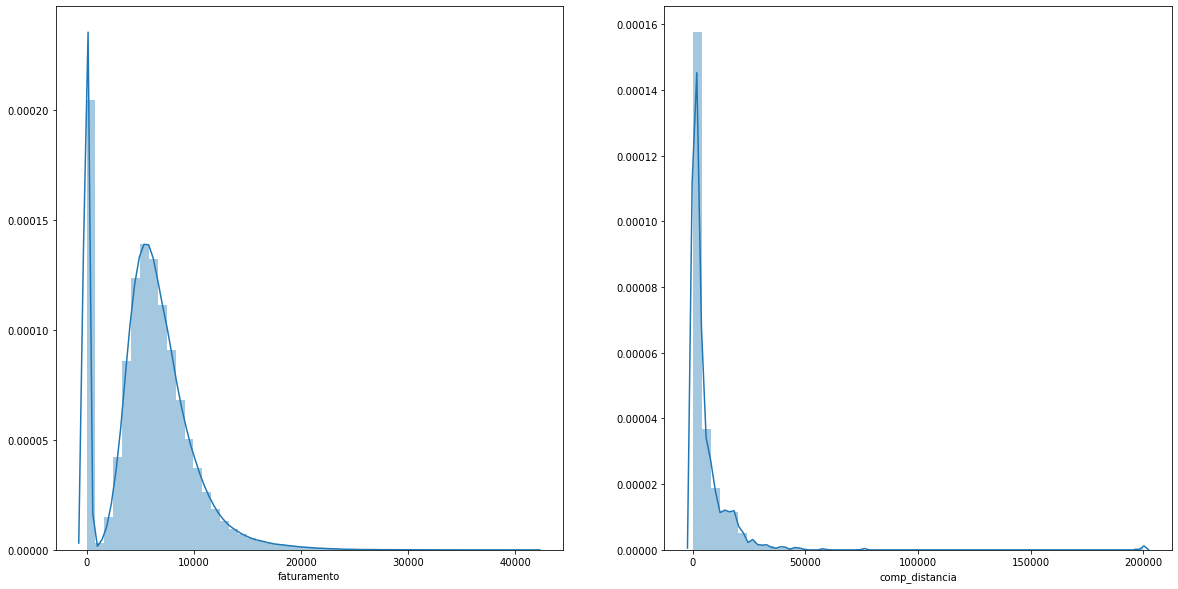

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot (1, 2, 1)
sns.distplot(df1['faturamento']);


plt.subplot (1, 2, 2)
sns.distplot(df1['comp_distancia']);


### Variáveis Categóricas

In [25]:
variaveis_cat.apply (lambda x: x.unique().shape[0])

feriado_tipo                 4
loja_tipo                    4
sortimento                   3
promo_continua_intervalo     4
dict_meses                  12
dtype: int64

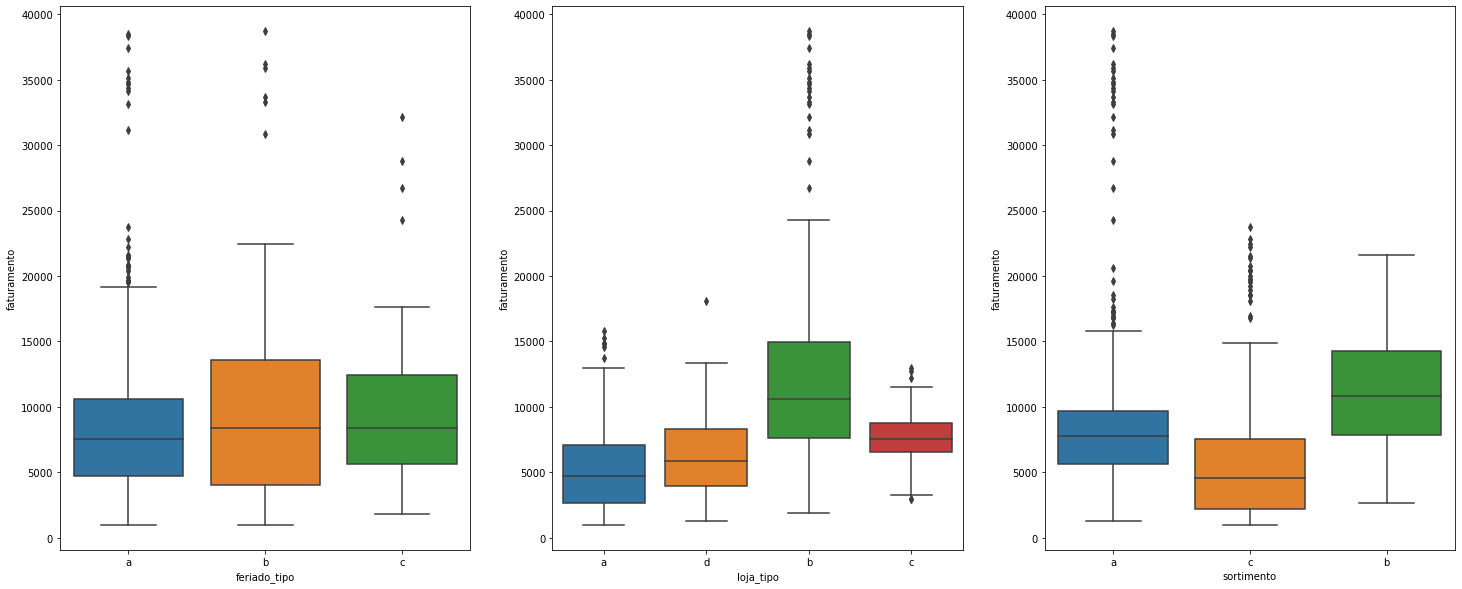

In [26]:
aux1 = df1[(df1['feriado_tipo'] != '0' ) & (df1['faturamento'] > 0)]

plt.figure(figsize=(25, 10))

plt.subplot (1, 3, 1)
sns.boxplot(x = 'feriado_tipo', y='faturamento', data = aux1);

plt.subplot (1, 3, 2)
sns.boxplot(x = 'loja_tipo', y='faturamento', data = aux1);

plt.subplot (1, 3, 3)
sns.boxplot(x = 'sortimento', y='faturamento', data = aux1);

# 2.0 FEATURE ENGINEERING (COMMENTS TODO)



*Criação de variáveis para exploração de dados e modelagem*

In [27]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipóteses

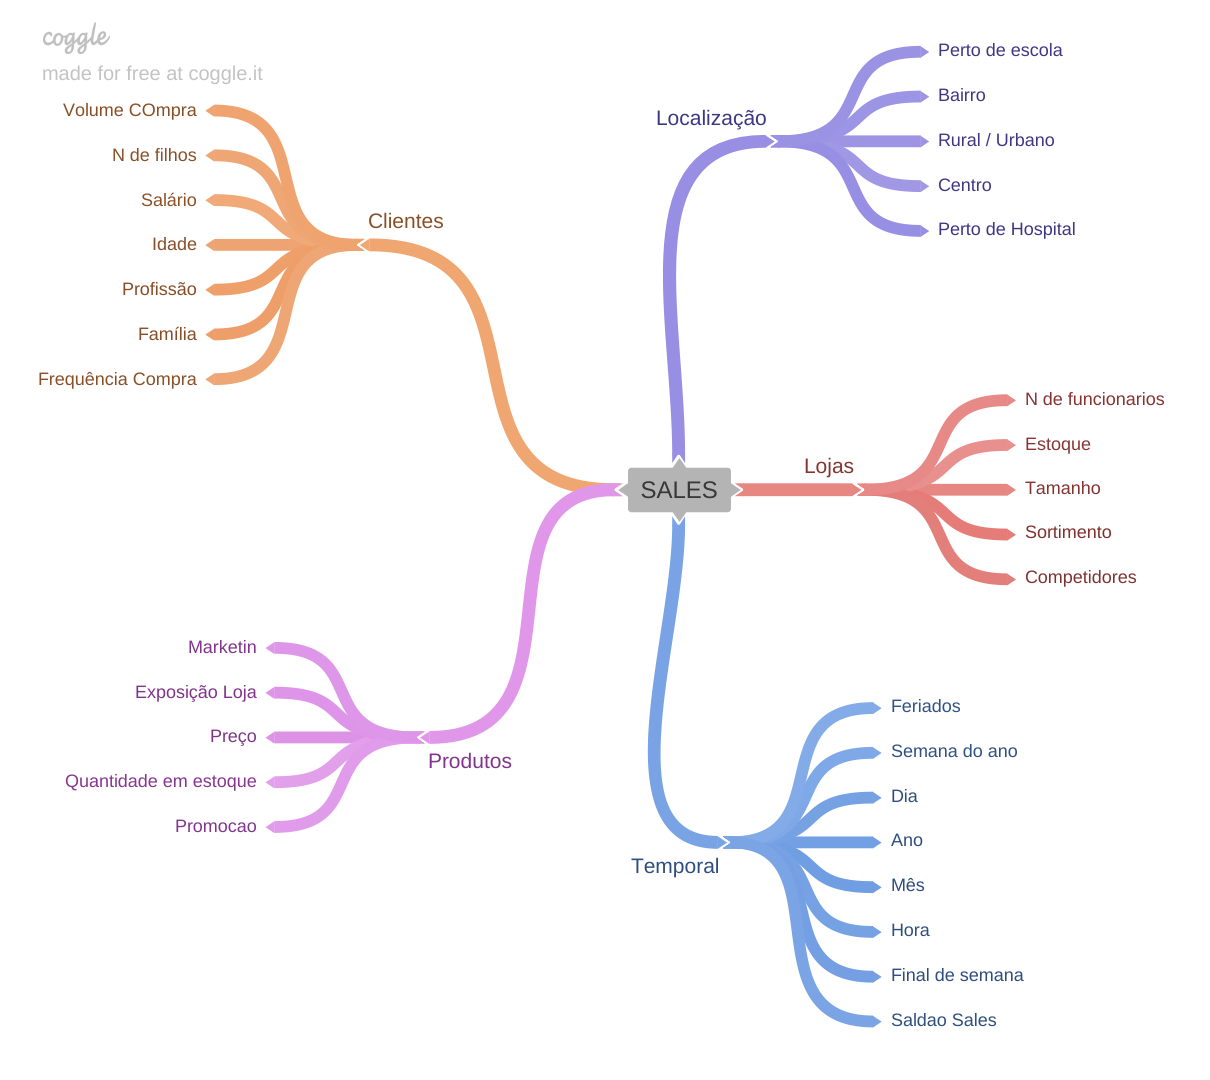

In [29]:
Image('mindmap_rossmann.png')

## 2.2 Lista Final de Hipóteses

 1. maior Sortimento > maior Vendas

 2. competidor próximo > menor Vendas

 3. competidor mais tempo aberto> maior Vendas

 4. promoção continua mais tempo > maior vendas

 5. promoções mais longas > maior vendas
 
 6. promoções consecutivas > maior vendas

 7. loja aberta no natal > maior vendas

 8. loja com passar dos anos > maior vendas

 9. loja no segundo semestre > maior vendas

 10. loja depois do dia 10 no mês > maior vendas

 11. lojas abertas no final de semana > menor vendas

 12. lojas abertas nos feriados escolares > menor vendas

## 2.3 Criação de variáveis

In [30]:
# split data em colunas
df2['data_ano']           = df2['data'].dt.year
df2['data_mes']           = df2['data'].dt.month
df2['data_dia']           = df2['data'].dt.day
df2['data_semana_do_ano'] = df2['data'].dt.weekofyear

# ano semana
df2['ano_semana'] = df2['data'].dt.strftime( '%Y-%W')

# Explicitando as variaveis sortimento e tipo do feriado
df2['sortimento'] = df2['sortimento'].apply(lambda x: 'basic' if x =='a' else 'extra' if x =='b' else 'extended')
df2['feriado_tipo'] = df2['feriado_tipo'].apply(lambda x: 'publico' if x == 'a' else 'easter' if x =='b' else 'christimas' if x =='c' else 'regular_day')


In [31]:
# competition since
df2['comp_aberto_desde'] = df2.apply(lambda x: datetime.datetime( year= x['comp_aberto_ano'], month= x['comp_aberto_mes'], day= 1), axis =1)
df2['comp_tempo_mes'] = ((df2['data'] - df2['comp_aberto_desde']) / 30).apply(lambda x: x.days).astype(int)

# promo since
df2['promocao_desde'] = df2['promo_continua_ano'].astype(str) + '-' + df2['promo_continua_semana'].astype( str)
df2['promocao_desde'] = df2['promocao_desde'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7))
df2['promocao_tempo_semana'] = (( df2 ['data'] - df2['promocao_desde'] ) /7 ).apply( lambda x: x.days).astype( int)

In [32]:
df2.sample(10).T

,537588,669690,168421,616727,57275,475351,120435,1009127,999602,398345
ID_loja,944,361,57,918,411,32,16,838,233,256
dia_da_semana,5,5,1,4,3,4,2,2,3,5
data,2014-03-07 00:00:00,2013-11-08 00:00:00,2015-03-02 00:00:00,2013-12-26 00:00:00,2015-06-10 00:00:00,2014-05-01 00:00:00,2015-04-14 00:00:00,2013-01-08 00:00:00,2013-01-16 00:00:00,2014-07-11 00:00:00
faturamento,7654,7474,15052,0,8179,0,9429,7818,6732,8324
clientes,1224,793,1318,0,650,0,1089,820,873,1060
loja_aberta,1,1,1,0,1,0,1,1,1,1
promocao_no_dia,1,1,1,0,0,1,1,1,0,0
feriado_tipo,regular_day,regular_day,regular_day,christimas,regular_day,publico,regular_day,regular_day,regular_day,regular_day
feriado_escolar,0,0,0,1,0,0,0,0,0,1
loja_tipo,c,c,d,a,d,a,a,d,a,a


# 3.0 FILTRAGEM

In [33]:
df3 = df2.copy()

## 3.1 Filtragem de Linhas (Restrições do négocio)

Descarta-se registros em que determinada loja não estava aberta e em que o faturamento foi nulo

In [34]:
df3 = df3[(df3['loja_aberta'] != 0) & (df3['faturamento'] > 0)]

## 3.2 Seleção das colunas (Restrições da modelagem)

Descarta-se as seguintes colunas:

> **clientes**

Não se tem esse valor no momento da predição (data leakage)

> **promo_continua_intervalo**

Essa coluna foi alvo de engenharia de variaveis para colunas que melhor explicam seus dados

> **dict_meses**

Essa coluna foi auxiliar para a coluna em_promocao

> **loja_aberta**
A variavel é booleana e como um de seus valores foi retirado na seção anterior ela apresentára o mesmo valor para todo o dataset. Assim, como é uma constante, necessita-se retirá-la


In [35]:
cols_to_drop = ['clientes', 'loja_aberta', 'dict_meses', 'promo_continua_intervalo']
df3 = df3.drop (cols_to_drop, axis =1)
df3.columns

Index(['ID_loja', 'dia_da_semana', 'data', 'faturamento', 'promocao_no_dia',
       'feriado_tipo', 'feriado_escolar', 'loja_tipo', 'sortimento',
       'comp_distancia', 'comp_aberto_mes', 'comp_aberto_ano',
       'promo_continua', 'promo_continua_semana', 'promo_continua_ano',
       'em_promocao', 'data_ano', 'data_mes', 'data_dia', 'data_semana_do_ano',
       'ano_semana', 'comp_aberto_desde', 'comp_tempo_mes', 'promocao_desde',
       'promocao_tempo_semana'],
      dtype='object')

# 4.0 ANÁLISE EXPLORATÓRIA DE DADOS (EDA) TODO

*Como as variáveis impactam impactam o fenômeno e qual a extensão desse impacto.*

In [36]:
# Cópia de segurança
df4 = df3.copy()

## 4.1 Análise Univariada

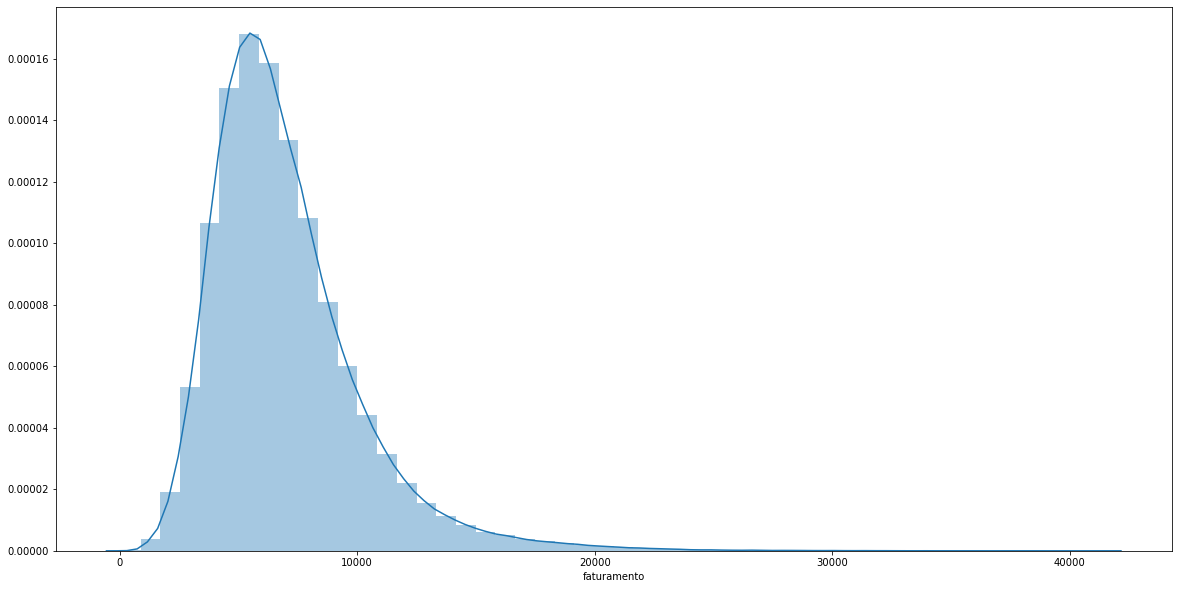

In [37]:
#Variável alvo
plt.figure(figsize=(20, 10))
sns.distplot(df4['faturamento']);

Percebe-se uma variável com distribuição próxima a normalidade assimétrica com calda a esquerda.



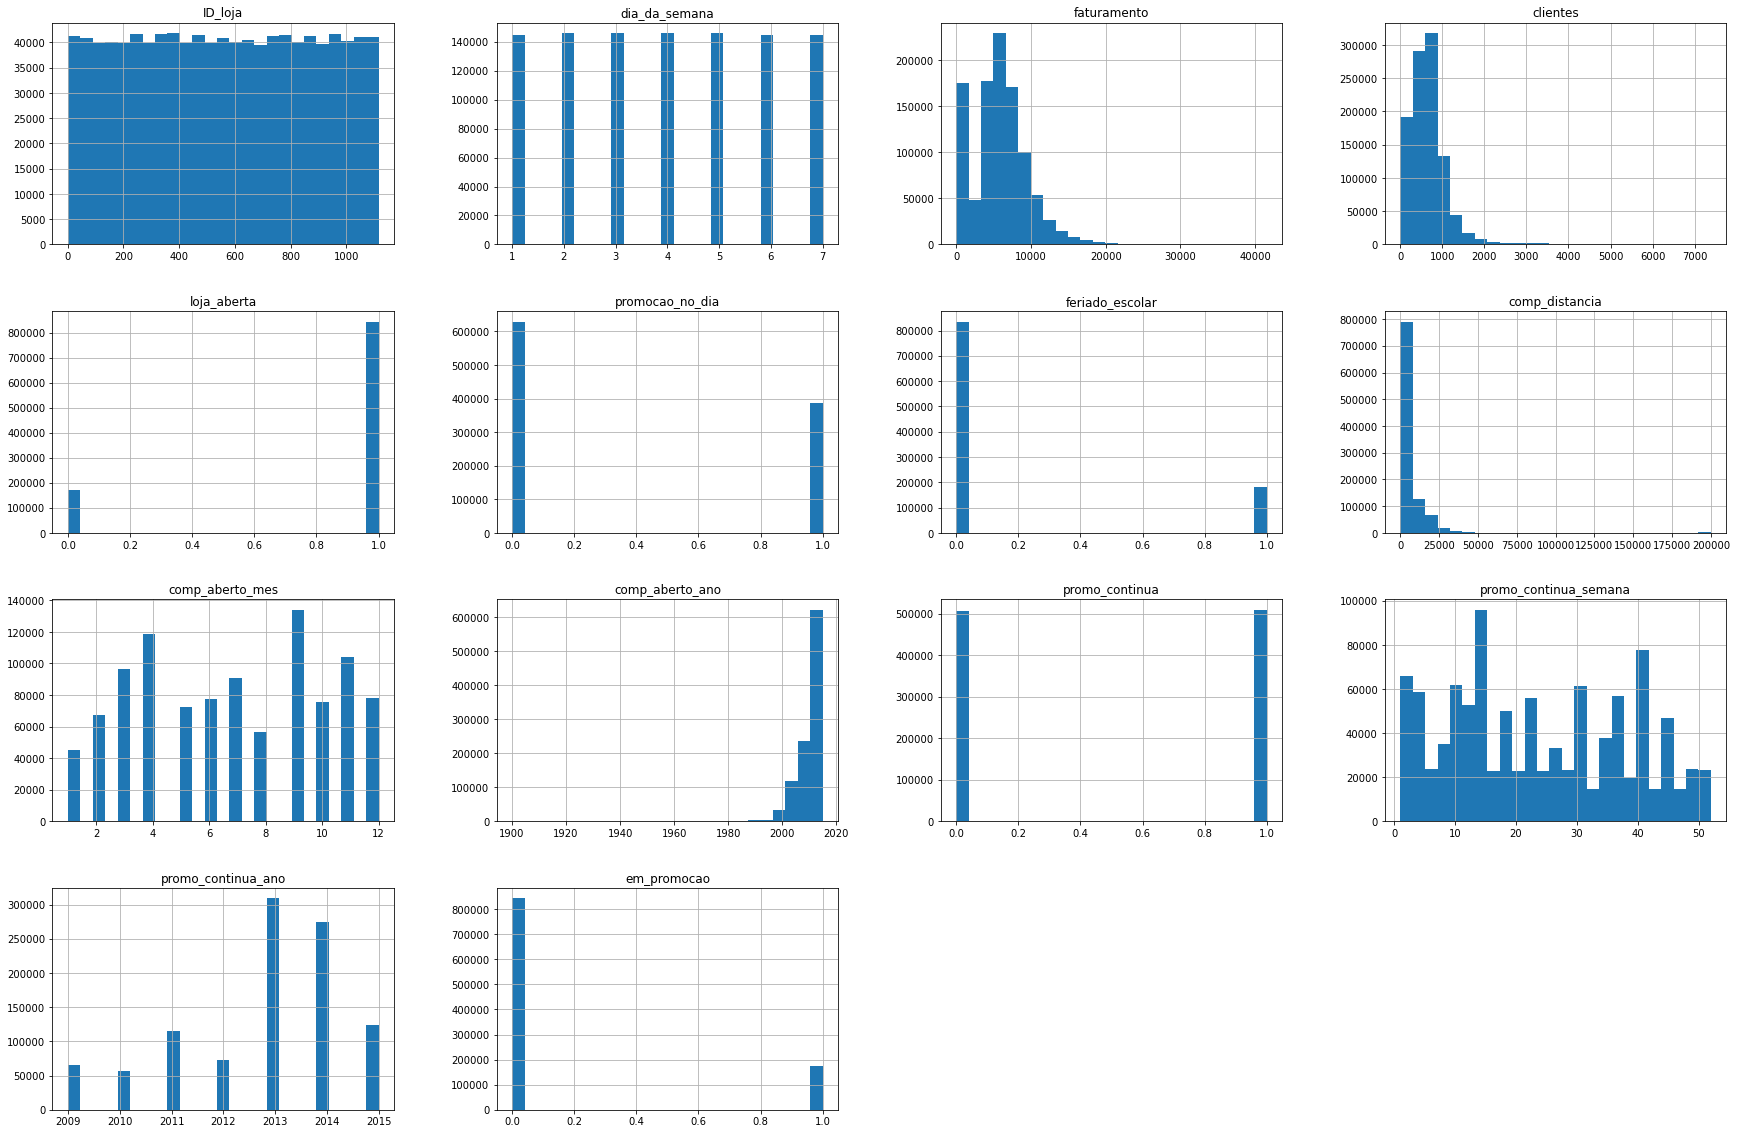

In [38]:
# Variáveis explicativas
variaveis_num.hist( bins= 25, figsize=(30, 20));
#variaveis_cat = df1.select_dtypes('object')

COMENTAR

In [39]:
variaveis_cat.head()

,feriado_tipo,loja_tipo,sortimento,promo_continua_intervalo,dict_meses
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


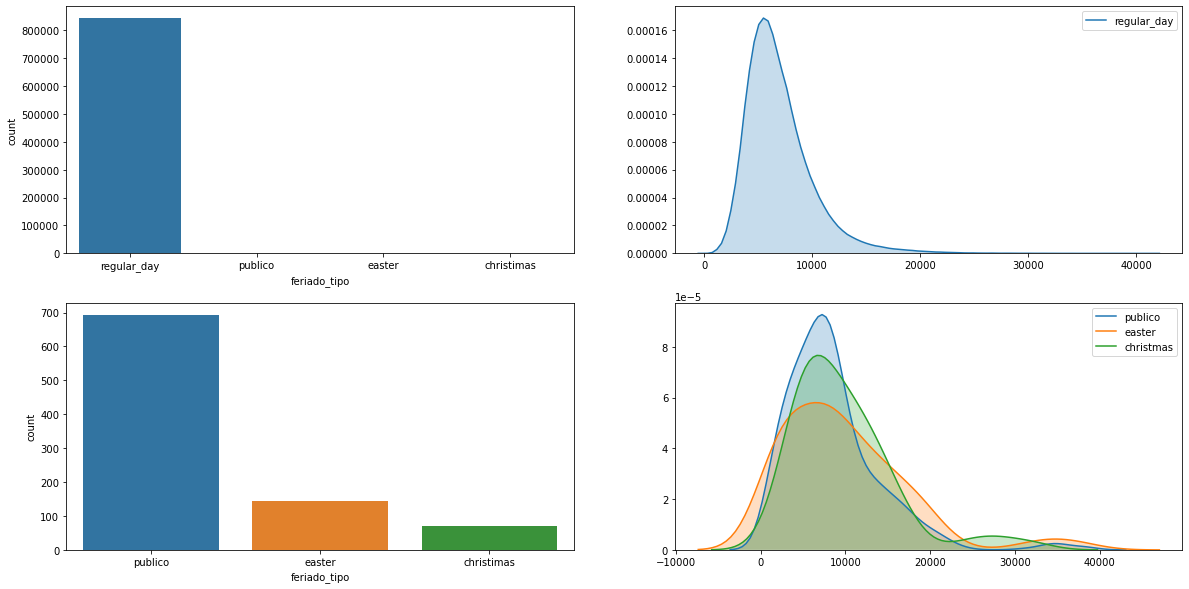

In [40]:
plt.figure(figsize=(20, 10))
plt.subplot (2, 2, 1)
sns.countplot(df4['feriado_tipo']);

plt.subplot (2, 2, 2)
sns.kdeplot(df4[df4['feriado_tipo'] == 'regular_day']['faturamento'], label='regular_day', shade = True);

plt.subplot (2, 2, 3)
sns.countplot(df4[df4['feriado_tipo'] != 'regular_day']['feriado_tipo']);

plt.subplot (2, 2, 4)
sns.kdeplot(df4[df4['feriado_tipo'] == 'publico']['faturamento'], label='publico', shade = True);
sns.kdeplot(df4[df4['feriado_tipo'] == 'easter']['faturamento'], label='easter', shade = True);
sns.kdeplot(df4[df4['feriado_tipo'] == 'christimas']['faturamento'], label='christmas', shade = True);


COMENTAR

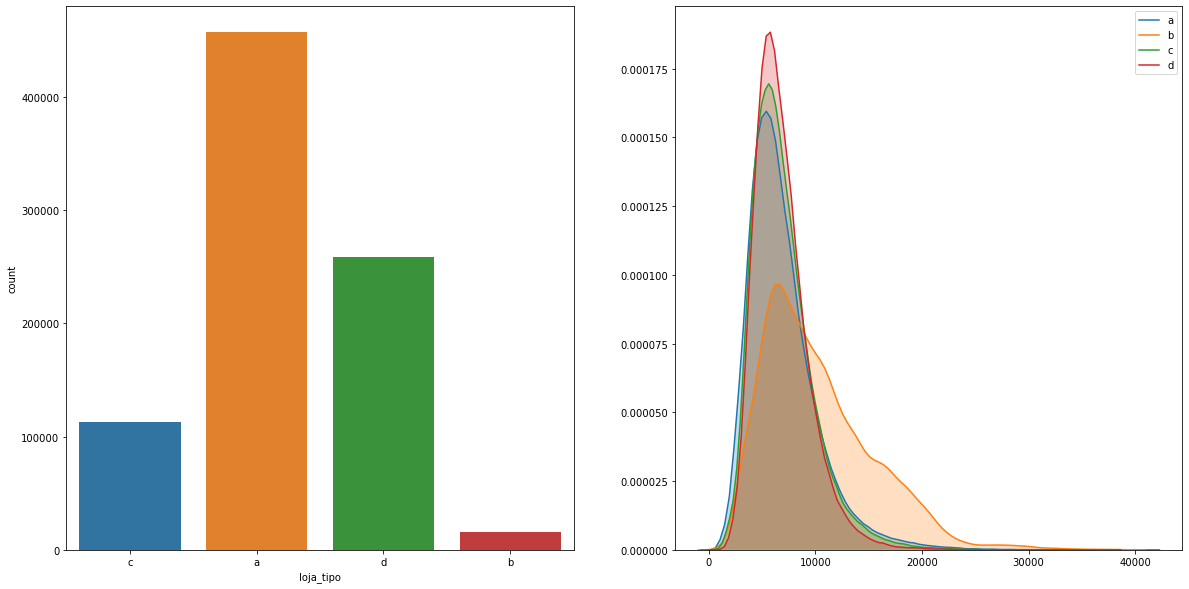

In [41]:
plt.figure(figsize=(20, 10))
plt.subplot (1,2, 1)
sns.countplot(df4['loja_tipo']);

plt.subplot (1, 2, 2)
sns.kdeplot(df4[df4['loja_tipo'] == 'a']['faturamento'], label='a', shade = True);
sns.kdeplot(df4[df4['loja_tipo'] == 'b']['faturamento'], label='b', shade = True);
sns.kdeplot(df4[df4['loja_tipo'] == 'c']['faturamento'], label='c', shade = True);
sns.kdeplot(df4[df4['loja_tipo'] == 'd']['faturamento'], label='d', shade = True);

COMENTAR

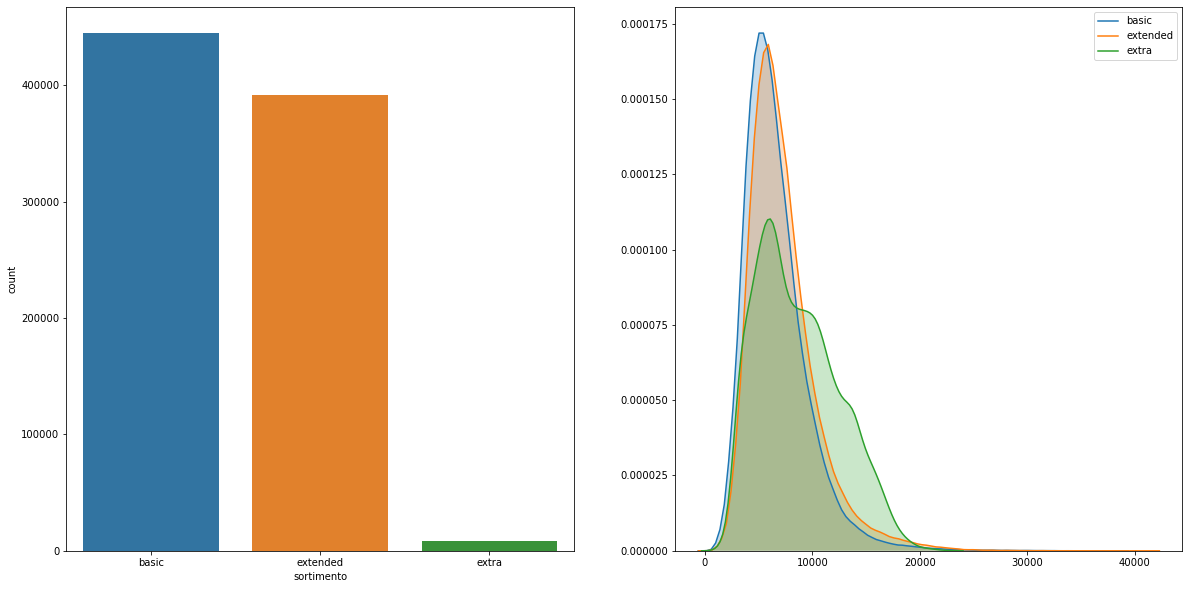

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot (1,2, 1)
sns.countplot(df4['sortimento']);

plt.subplot (1, 2, 2)
sns.kdeplot(df4[df4['sortimento'] == 'basic']['faturamento'], label='basic', shade = True);
sns.kdeplot(df4[df4['sortimento'] == 'extended']['faturamento'], label='extended', shade = True);
sns.kdeplot(df4[df4['sortimento'] == 'extra']['faturamento'], label='extra', shade = True);

## 4.2 Análise Bivariada

### **H1**. Lojas com maior sortimentos deveriam vender mais

**FALSO**. Lojas com maior sortimento vendem menos

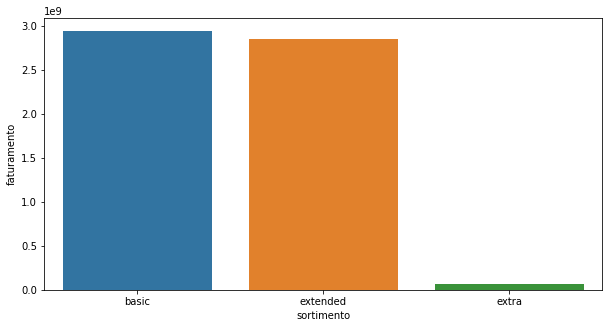

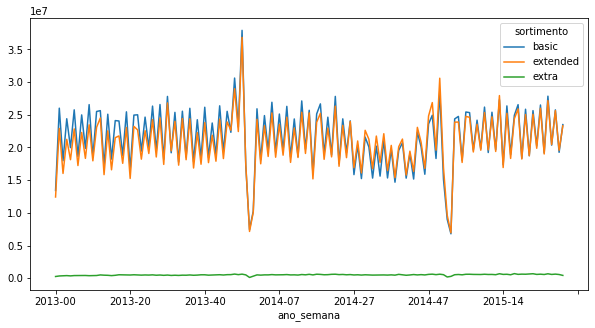

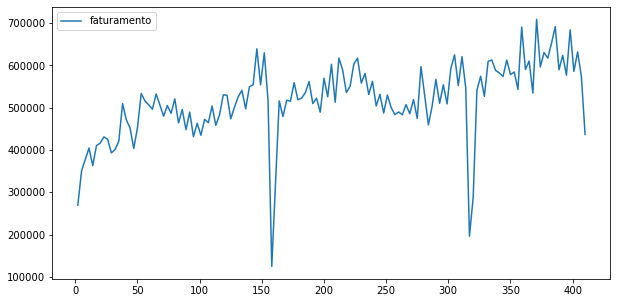

In [43]:
aux1 = df4[['sortimento', 'faturamento']].groupby('sortimento').sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x = 'sortimento', y ='faturamento', data=aux1);

aux2 = df4[['ano_semana', 'sortimento', 'faturamento']].groupby(['ano_semana', 'sortimento']).sum().reset_index()
aux3 = aux2.pivot(index = 'ano_semana', columns= 'sortimento', values='faturamento')
aux3.plot(figsize=(10, 5));

aux4 = aux2[aux2['sortimento'] == 'extra']
aux3 = aux2.pivot(index = 'ano_semana', columns= 'sortimento', values='faturamento')
aux4.plot(figsize=(10, 5));


### **H2**. Lojas com competidores mais próximos deveriam vender menos
**FALSO**. Lojas com competidores **mais próximos** vendem **mais**

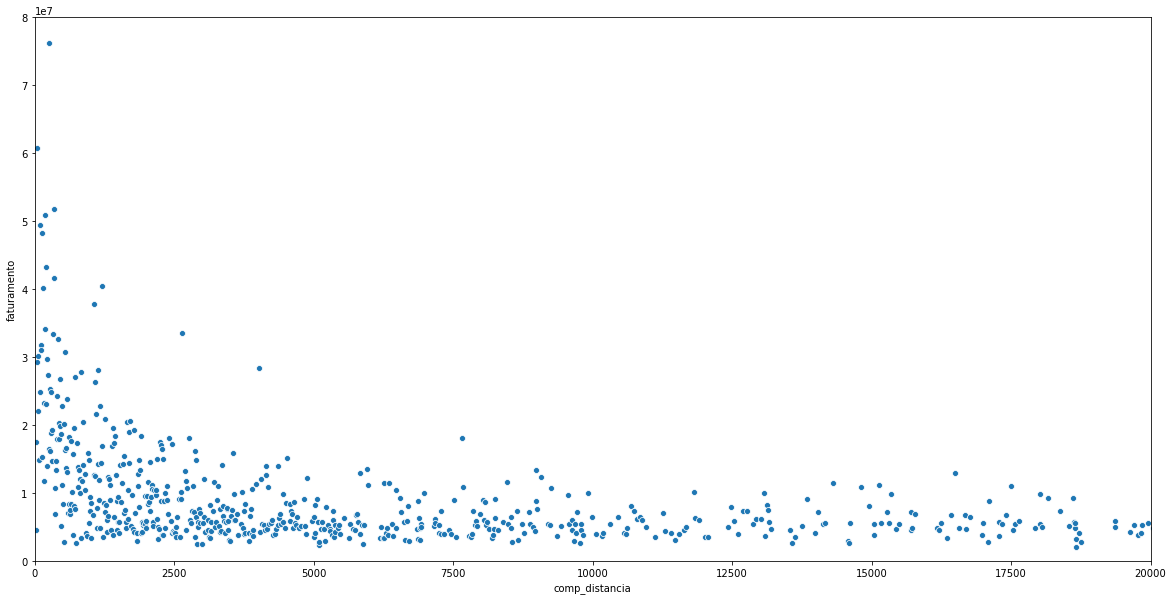

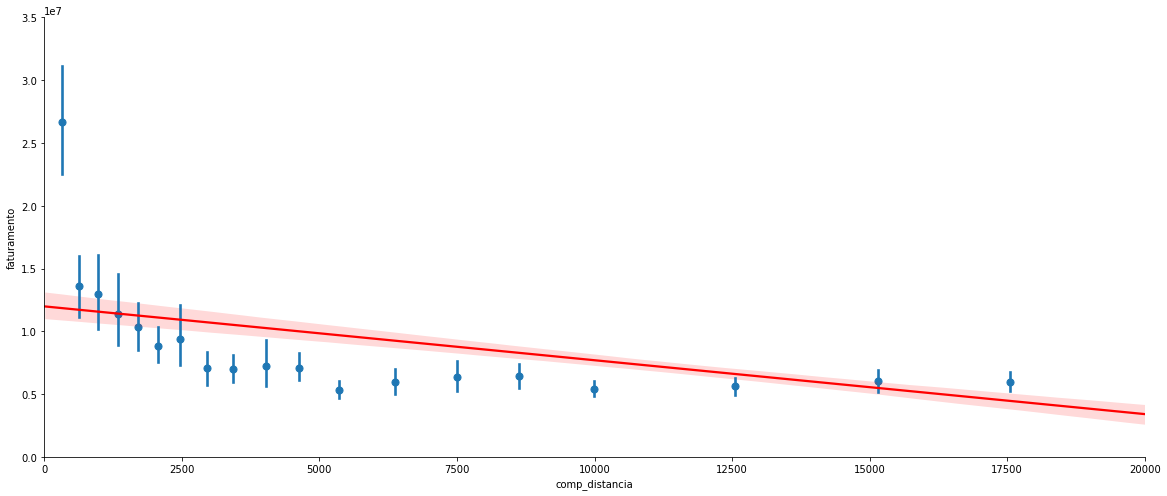

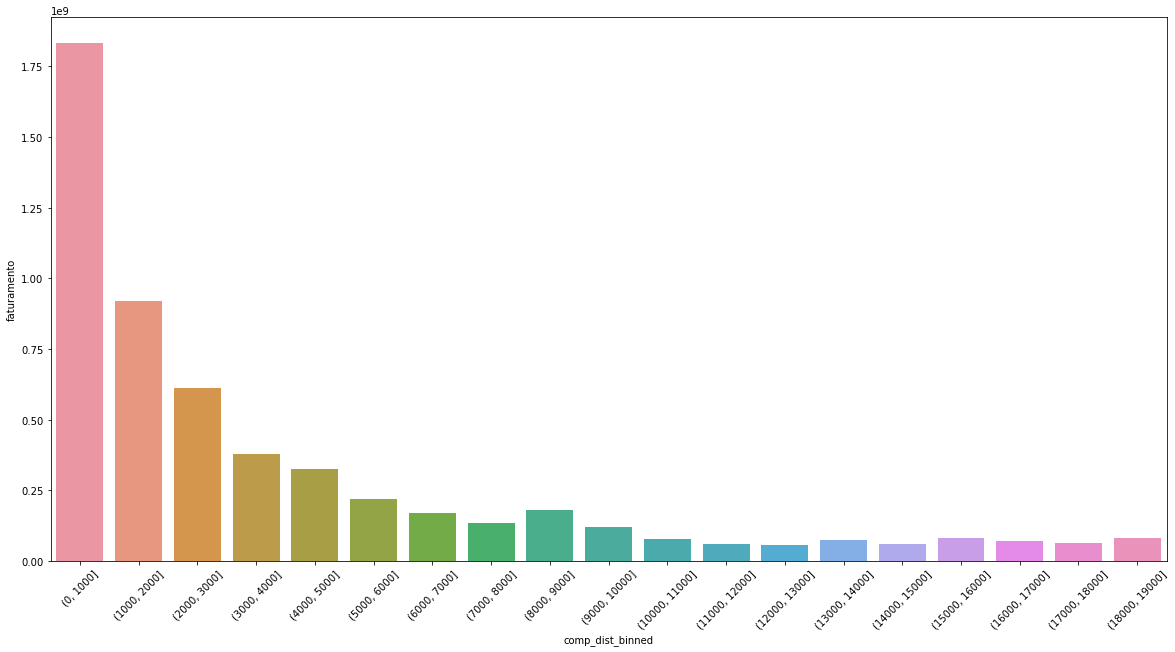

In [44]:
#scatter plot
plt.figure(figsize=(20, 10))
aux1 = df4[['comp_distancia' , 'faturamento']].groupby('comp_distancia').sum().reset_index()
sns.scatterplot(x='comp_distancia', y = 'faturamento', data = aux1);
plt.xlim(0, 20000);
plt.ylim(0, 8e7);

#linear model plot
aux2 = df4.query('comp_distancia < 30000', engine='python')[['comp_distancia', 'faturamento']].groupby('comp_distancia').sum().reset_index()
sns.lmplot(x='comp_distancia', y = 'faturamento', data = aux2, height= 7, aspect= 2.3, x_bins = 20,  line_kws={'color': 'red'});
plt.ylim(0, 3.5e7);
plt.xlim(0, 20000);

#bar plot binned
aux1 = df4[['comp_distancia', 'faturamento']].groupby('comp_distancia').sum().reset_index()

bins = list( np.arange(0,20000,1000))

aux1['comp_dist_binned'] = pd.cut(aux1['comp_distancia'], bins = bins)
aux2 = aux1[['comp_dist_binned', 'faturamento']].groupby('comp_dist_binned').sum().reset_index()

plt.figure(figsize=(20, 10))
sns.barplot( x = 'comp_dist_binned', y = 'faturamento', data=aux2);
plt.xticks(rotation=45);

### **H3**. Lojas com competidores à mais tempo deveriam vender mais.
**FALSO.** Lojas com competidores à **mais tempo** **vendem menos**.

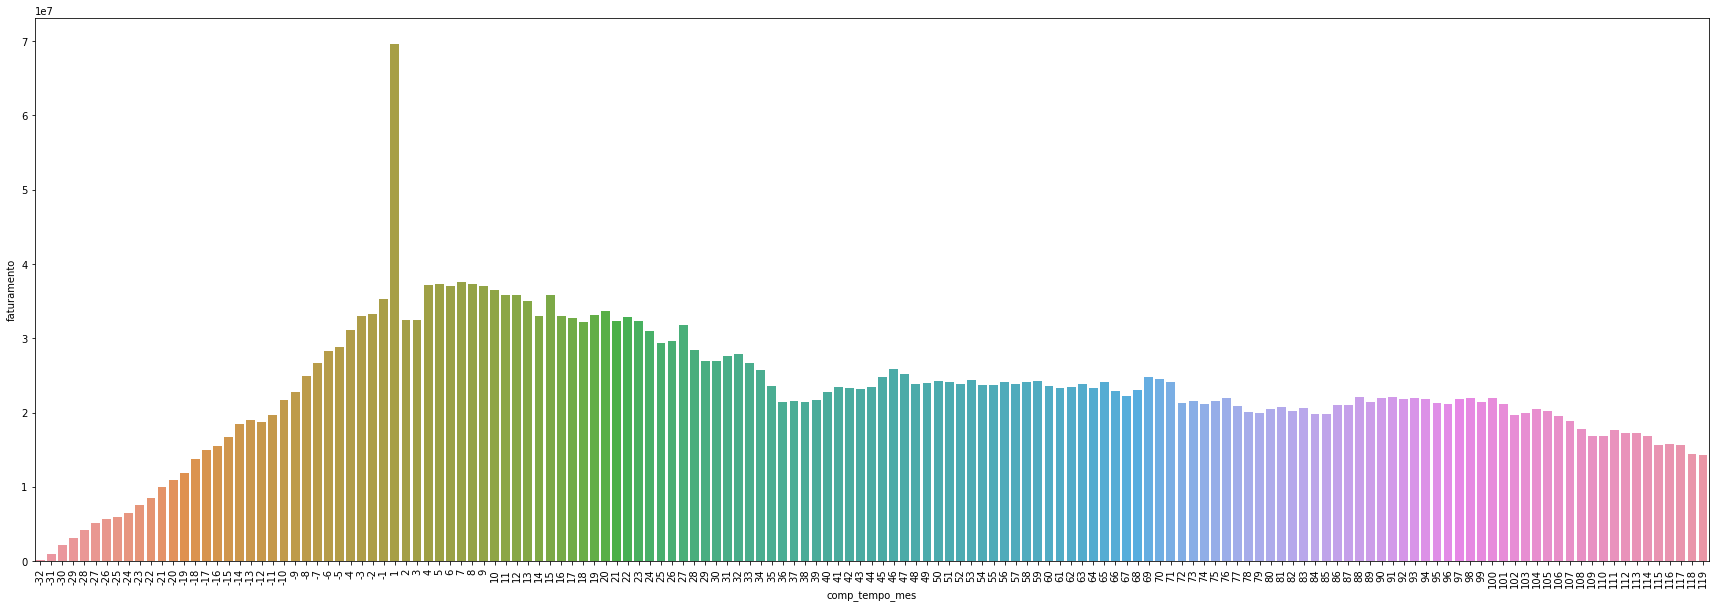

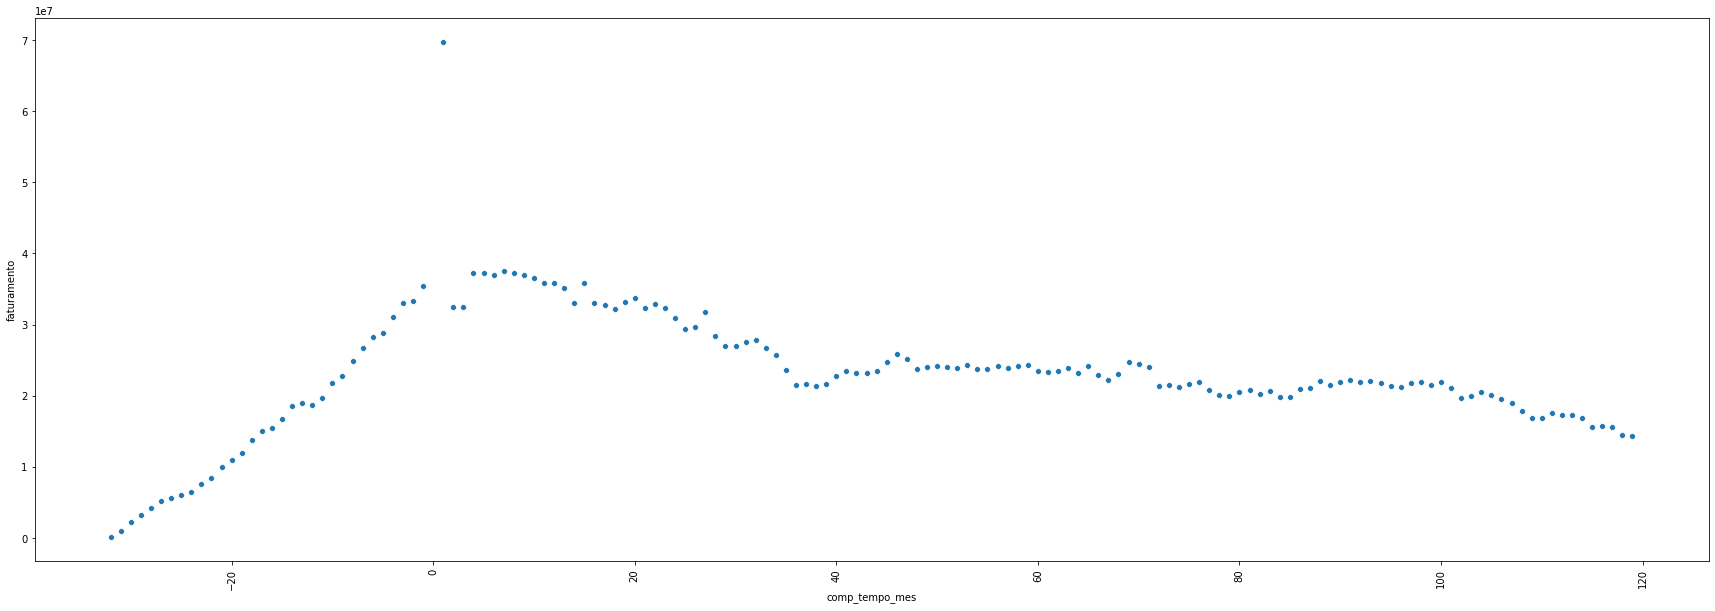

In [45]:
aux1 = df4[['comp_tempo_mes', 'faturamento']].groupby('comp_tempo_mes').sum().reset_index()
aux2 = aux1[(aux1['comp_tempo_mes'] < 120) & (aux1['comp_tempo_mes'] !=0)]
plt.figure(figsize=(30, 10))
sns.barplot(x='comp_tempo_mes', y = 'faturamento', data = aux2);
plt.xticks(rotation = 90);
plt.figure(figsize=(30, 10))
sns.scatterplot(x='comp_tempo_mes', y = 'faturamento', data = aux2);
plt.xticks(rotation = 90);

## 4.3 Análise Multivariada

# 5.0 PREPARAÇÃO DE DADOS (COMMENTS TODO)

In [87]:
df5 = df4.copy()

## 5.1 Normalização

## 5.2 Rescala

In [88]:
df5.select_dtypes( include=['int64', 'float64']).head().T

,0,1,2,3,4
ID_loja,1,2,3,4,5
dia_da_semana,5,5,5,5,5
faturamento,5263,6064,8314,13995,4822
promocao_no_dia,1,1,1,1,1
feriado_escolar,1,1,1,1,1
comp_distancia,1270,570,14130,620,29910
comp_aberto_mes,9,11,12,9,4
comp_aberto_ano,2008,2007,2006,2009,2015
promo_continua,0,1,1,0,0
promo_continua_semana,31,13,14,31,31


In [89]:
rs = RobustScaler()
mms = MinMaxScaler()

# competition distance
df5['comp_distancia'] = rs.fit_transform( df5[['comp_distancia']].values )

# competition time month
df5['comp_aberto_mes'] = rs.fit_transform( df5[['comp_aberto_mes']].values )

# promo time week
df5['promocao_tempo_semana'] = mms.fit_transform( df5[['promocao_tempo_semana']].values )

#year
df5['data_ano'] = mms.fit_transform( df5[['data_ano']].values )

In [90]:
df5.select_dtypes( include=['int64', 'float64']).head().T

,0,1,2,3,4
ID_loja,1.000000,2.000000,3.000000,4.000000,5.000000
dia_da_semana,5.000000,5.000000,5.000000,5.000000,5.000000
faturamento,5263.000000,6064.000000,8314.000000,13995.000000,4822.000000
promocao_no_dia,1.000000,1.000000,1.000000,1.000000,1.000000
feriado_escolar,1.000000,1.000000,1.000000,1.000000,1.000000
comp_distancia,-0.170968,-0.283871,1.903226,-0.275806,4.448387
comp_aberto_mes,0.333333,0.666667,0.833333,0.333333,-0.500000
comp_aberto_ano,2008.000000,2007.000000,2006.000000,2009.000000,2015.000000
promo_continua,0.000000,1.000000,1.000000,0.000000,0.000000
promo_continua_semana,31.000000,13.000000,14.000000,31.000000,31.000000


## 5.3 Transformações

### 5.3.1 Encoding (TODO ler artigo de encoding nos comentarios)

In [91]:
df5.select_dtypes( include=['object']).head().T

,0,1,2,3,4
feriado_tipo,regular_day,regular_day,regular_day,regular_day,regular_day
loja_tipo,c,a,a,c,a
sortimento,basic,basic,basic,extended,basic
ano_semana,2015-30,2015-30,2015-30,2015-30,2015-30


In [92]:
#tipos de encodding: one-hot, label, ordinal, target, frequency, embedding
#mais em https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

#state holiday - one hot encoder
df5 = pd.get_dummies (df5, prefix=['feriado_tipo'], columns=['feriado_tipo'])

#store type - label encoder
le = LabelEncoder()
df5['loja_tipo'] = le.fit_transform( df5['loja_tipo'])

#assortment - ordinal Encoder
df5['sortimento'] = df5['sortimento'].map({'basic' : 1, 'extra': 2, 'extended': 3})


In [93]:
df5.head().T

,0,1,2,3,4
ID_loja,1,2,3,4,5
dia_da_semana,5,5,5,5,5
data,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
faturamento,5263,6064,8314,13995,4822
promocao_no_dia,1,1,1,1,1
feriado_escolar,1,1,1,1,1
loja_tipo,2,0,0,2,0
sortimento,1,1,1,3,1
comp_distancia,-0.170968,-0.283871,1.90323,-0.275806,4.44839
comp_aberto_mes,0.333333,0.666667,0.833333,0.333333,-0.5


### 5.3.2 Transformations

In [94]:
# transformação da variável resposta em log
df5['faturamento'] = np.log( df5['faturamento'] )

In [95]:
#tipos de transformações: log, box-cox, cube-root, sqrt, sin, cosin
# mais em: ????????????????

# mês
df5['mes_sin'] = df5['data_mes'].apply( lambda x: np.sin( x * ( 2. *np.pi/12 )))
df5['mes_cos'] = df5['data_mes'].apply( lambda x: np.cos( x * ( 2. *np.pi/12 )))

# dia
df5['dia_sin'] = df5['data_dia'].apply( lambda x: np.sin( x * ( 2. *np.pi/30 )))
df5['dia_cos'] = df5['data_dia'].apply( lambda x: np.cos( x * ( 2. *np.pi/30 )))

# semana do ano (sda)
df5['sda_sin'] = df5['data_semana_do_ano'].apply( lambda x: np.sin( x * ( 2. *np.pi/52 )))
df5['sda_cos'] = df5['data_semana_do_ano'].apply( lambda x: np.cos( x * ( 2. *np.pi/52 )))

# dia da semana (dds)
df5['dds_sin'] = df5['dia_da_semana'].apply( lambda x: np.sin( x * ( 2. *np.pi/7 )))
df5['dds_cos'] = df5['dia_da_semana'].apply( lambda x: np.cos( x * ( 2. *np.pi/7 )))


In [96]:
df5[['data_ano', 'data_mes', 'data_dia', 'data_semana_do_ano', 'dia_da_semana',
     'mes_sin', 'mes_cos',
     'dia_sin', 'dia_cos',
     'sda_sin', 'sda_cos',
     'dds_sin', 'dds_cos',
     ]].head(5).T

,0,1,2,3,4
data_ano,1.000000,1.000000,1.000000,1.000000,1.000000
data_mes,7.000000,7.000000,7.000000,7.000000,7.000000
data_dia,31.000000,31.000000,31.000000,31.000000,31.000000
data_semana_do_ano,31.000000,31.000000,31.000000,31.000000,31.000000
dia_da_semana,5.000000,5.000000,5.000000,5.000000,5.000000
mes_sin,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000
mes_cos,-0.866025,-0.866025,-0.866025,-0.866025,-0.866025
dia_sin,0.207912,0.207912,0.207912,0.207912,0.207912
dia_cos,0.978148,0.978148,0.978148,0.978148,0.978148
sda_sin,-0.568065,-0.568065,-0.568065,-0.568065,-0.568065


In [97]:
# Deletando colunas que sofreram transformação:

cols_drop = ['data_mes',
            'data_dia',
            'data_semana_do_ano',
            'dia_da_semana',
            'ano_semana',
            'promocao_desde',
            'comp_aberto_desde']
            
df5 = df5.drop(cols_drop, axis = 1)

# 6.0 SEPARAÇÃO E SELEÇÃO DE VARIÁVEIS PARA MODELAGEM

In [98]:
#cópia de segurança
df6 = df5.copy()

## 6.1 Split

In [99]:
# Inicio de tempo no dataset
data_inicio = df6[['loja_tipo', 'data']].groupby('loja_tipo').min().reset_index()['data'][0]

# Final de tempo no dataset
data_fim = df6[['loja_tipo', 'data']].groupby('loja_tipo').max().reset_index()['data'][0]

# periodo separado para treino (6 semanas = 42 dias)
period = 42

# Final de tempo de treino
train_last_date = df6[['loja_tipo', 'data']].groupby('loja_tipo').max().reset_index()['data'][0] - datetime.timedelta( days = period)

# Dataset de treino
X_train = df6[df6['data'] < train_last_date]
y_train = X_train['faturamento']

# Dataset de teste
X_test = df6[df6['data'] >= train_last_date]
y_test = X_test['faturamento']

# Prints
print ("Dimensão de tempo para treino\nDe:", X_train['data'].min(),"\nAté:", X_train['data'].max())
print ("\nDimensão de tempo para teste\nDe:", X_test['data'].min(),"\nAté:", X_test['data'].max())
print ("\nDias separados para treino: ", period, " dias (", period/7, "semanas)." )


Dimensão de tempo para treino
De: 2013-01-01 00:00:00 
Até: 2015-06-18 00:00:00

Dimensão de tempo para teste
De: 2015-06-19 00:00:00 
Até: 2015-07-31 00:00:00

Dias separados para treino:  42  dias ( 6.0 semanas).


## Seleção de Variáveis com Boruta

In [102]:
# Dataset de treino e teste para boruta

# Amostragem para teste de runtime do boruta
n_samples = 10000

X_train_arr = X_train.drop(['data', 'faturamento'], axis = 1).sample(n_samples).values
y_train_arr = y_train.sample(n_samples).values.ravel()

#define regressor como randomforest
rf = RandomForestRegressor( n_jobs= -1)

# Running boruta
boruta = BorutaPy( rf, n_estimators = 'auto', verbose = 2, random_state= 42).fit( X_train_arr, y_train_arr)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	27


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	27


In [104]:
cols_selected = boruta.support_.tolist()

# Melhores variaveis
X_train_fs = X_train.drop(['data', 'faturamento'], axis =1)
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# not selected boruta
cols_not_selected_boruta = list( np.setdiff1d( X_train_fs.columns, cols_selected_boruta ) )

## 6 .3 Variáveis Escolhidas para modelagem

In [105]:
df6.columns

Index(['ID_loja', 'data', 'faturamento', 'promocao_no_dia', 'feriado_escolar',
       'loja_tipo', 'sortimento', 'comp_distancia', 'comp_aberto_mes',
       'comp_aberto_ano', 'promo_continua', 'promo_continua_semana',
       'promo_continua_ano', 'em_promocao', 'data_ano', 'comp_tempo_mes',
       'promocao_tempo_semana', 'feriado_tipo_christimas',
       'feriado_tipo_easter', 'feriado_tipo_publico',
       'feriado_tipo_regular_day', 'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos',
       'sda_sin', 'sda_cos', 'dds_sin', 'dds_cos'],
      dtype='object')

In [112]:
# Variaveis escolhidas pelo boruta
cols_selected_boruta =['ID_loja',
                       'promo_continua',
                       'loja_tipo',
                       'sortimento',
                       'comp_distancia',
                       'comp_aberto_mes',
                       'comp_aberto_ano',
                       'promocao_no_dia',
                       'promo_continua_semana',
                       'promo_continua_ano',
                       'promocao_tempo_semana',
                       'dds_sin',
                       'dds_cos',
                       'mes_sin',
                       'mes_cos',
                       'dia_sin',
                       'dia_cos',
                       'sda_sin',
                       'sda_cos']

# Retornando variaveis eliminadas antes da escolha pelo boruta
feat_to_add =['data', 'faturamento']

# Variaveis finais
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend( feat_to_add )

In [113]:
print(cols_selected_boruta_full)

['ID_loja', 'promo_continua', 'loja_tipo', 'sortimento', 'comp_distancia', 'comp_aberto_mes', 'comp_aberto_ano', 'promocao_no_dia', 'promo_continua_semana', 'promo_continua_ano', 'promocao_tempo_semana', 'dds_sin', 'dds_cos', 'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'sda_sin', 'sda_cos', 'data', 'faturamento']


# 7.0 ESCOLHA DE MODELO

In [114]:
df7 = df6.copy()

In [115]:
x_train = X_train[ cols_selected_boruta]
x_test = X_test[ cols_selected_boruta]

## 7.1 Average Model (dummy)


In [116]:
aux1= x_test.copy()
aux1['faturamento'] = y_test.copy()

# prediction
aux2 = aux1[['ID_loja', 'faturamento']].groupby('ID_loja').mean().reset_index().rename(columns={'faturamento' : 'predições'})
aux1 = pd.merge(aux1, aux2, how='left', on='ID_loja')
y_pred_baseline = aux1['predições']

#perfomance
baseline_result = ml_error('Average Model', np.expm1(y_test), np.expm1(y_pred_baseline))
baseline_result

,Model Name,MAE,MAPE,RMSE
0,Average Model,1354.800167,0.45515,1835.141019


## 7.2 Regressão Linear

In [117]:
# Instanciando modelo
lr = LinearRegression().fit(x_train, y_train)
y_pred_lr = lr.predict( x_test)

lr_result = ml_error('LinearRegression', np.expm1(y_test), np.expm1(y_pred_lr))
lr_result

,Model Name,MAE,MAPE,RMSE
0,LinearRegression,1867.255209,0.292794,2671.364521


## 7.3 Regressão Linear Regularizada (LASSO)

In [124]:
# Instanciando modelo
lasso = Lasso(alpha=0.01).fit(x_train, y_train)
y_pred_lasso = lasso.predict( x_test)

lasso_result = ml_error('Linear Regression - Lasso', np.expm1(y_test), np.expm1(y_pred_lasso))
lasso_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression - Lasso,1892.007844,0.28916,2745.030238


## 7.4 Random Forest Regressor

In [120]:
# Instanciando modelo
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42).fit(x_train, y_train)
y_pred_rf = rf.predict( x_test)

rf_result = ml_error('Random Forest Regressor', np.expm1(y_test), np.expm1(y_pred_rf))
rf_result

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,665.511134,0.097347,1001.036229


## 7.5 XGBoost Regressor

In [121]:
# Instanciando modelo
model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                              n_estimators = 100,
                              eta= 0.01,
                              max_depth=10,
                              subsample=0.7,
                              colsample_bytree=0.9)

model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict( x_test)

xgb_result = ml_error('XG BRegressor', np.expm1(y_test), np.expm1(y_pred_xgb))
xgb_result

,Model Name,MAE,MAPE,RMSE
0,XG BRegressor,6682.793663,0.949478,7330.270543


## 7.6 Comparação dos modelos

In [125]:
comp_results= pd.concat([baseline_result,
                      lr_result,
                      lasso_result,
                      rf_result,
                      xgb_result])

comp_results.sort_values('RMSE')

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,665.511134,0.097347,1001.036229
0,Average Model,1354.800167,0.455150,1835.141019
0,LinearRegression,1867.255209,0.292794,2671.364521
0,Linear Regression - Lasso,1892.007844,0.289160,2745.030238
0,XG BRegressor,6682.793663,0.949478,7330.270543


# 8.0 OTIMIZAÇÃO DE HIPERPARÂMETROS

*Encontrar o conjunto de parâmetros que maximiza o aprendizado do modelo*
*(random, grid, bayesian)*

## 8.1 Ramdom Search

In [ ]:
params = {'n_estimators':     [1500, 1700, 2500, 3000, 3500 ],
          'eta':              [0.01, 0.03                   ],
          'max_depth':        [3,    5,    9                ],
          'subsample':        [0.1,  0.5,  0.7              ],
          'colsample_bytree':  [0.3,  0.7,  0.9             ],
          'min_child_weight': [3,    8,    15               ]}

n_iterations = 10

In [ ]:
final_result = pd.DataFrame()

for n in range(n_iterations):

  # Escolha randomica de parametros
  hp = { k: random.sample(v,1)[0] for k,v in params.items() }
  print( hp)
  
  # Instanciando estimador
  model_xgb = XGBRegressor( objective='ref:squarederror',
                                n_estimators=hp['n_estimators'],
                                eta=hp['eta'],
                                max_depth=hp['max_depth'],
                                subsample=hp['subsample'],
                                colsample_bytee= hp['colsample_bytree'],
                                min_child_weight= hp['min_child_weight'])
  
  # Performance
  result = cross_validation( X_training, 2, 'XGBoost Regressor', model_xgb, verbose=False)
  final_result = pd.concat((final_result, result))

final_result

## 8.2 Modelo final

In [ ]:
params_opt = { 'n_estimators':    30 00,
               'eta':             0.03,
               'max_depth':       5   ,
               'subsample':       0.7 ,
               'colsample_bytree':0.7 ,
               'min_child_weight':3   }

In [ ]:
# Instanciando estimador
model_xgb_opt = xgb.XGBRegressor( objective=               'ref:squarederror'    ,
                                 n_estimators=     params_opt['n_estimators']    ,
                                 eta=              params_opt['eta']             ,
                                 max_depth=        params_opt['max_depth']       ,
                                 subsample=        params_opt['subsample']       ,
                                 colsample_bytee=  params_opt['colsample_bytree'],
                                 min_child_weight= params_opt['min_child_weight'])

# Treino
model_xgb_opt.fit( x_train, y_train)

# Predições
y_pred_xgb_opt = model_xgb_opt.predict ( x_test)

# Performance
result_opt = ml_error( 'XGBoost Regressor Optimized', np.expm1( y_test), np.expm1( y_pred_xgb_opt))
result_opt

XGBoostError: ignored

## 8.3 Salvando o modelo

In [ ]:
import pickle

In [ ]:
file_path_str = ''
piclke.dump( model_xgb_opt, open(file_path_str, 'wb'))

# 9.0 RESULTADOS E INTERPRETAÇÃO

## Performance do modelo sobre o negócio.
*MAE, MAPE e MPE*

MAE: Mean Absolute error (Erro absoluto médio),
i.e a média das distâncias das medidas reais com o valor predito

MAPE: Mean Absolute Percentage Error (Erro absoluto médio percetual),
i.e a média das distâncias das medidas reais com o valor predito relativo as medidas reais (em %)

In [ ]:
print( "target_min: ", np.expm1(y_test).min())
print( "target_max: ", np.expm1(y_test).max())
print( "target_range: ", (np.expm1(y_test).max() - np.expm1(y_test).min()) )
print( "target_mean: ", round(np.expm1(y_test).mean() , 2))

print( '\nMAE: ', round(664.974996,2)) #acessar direto do dataframe do resultado do modelo otimizado
print( 'MAPE: ', round(0.097529 * 100,2),'%  (MAE / Target.mean)') #acessar direto do dataframe do resultado do modelo otimizado

target_min:  568.0
target_max:  41550.0
target_range:  40982.0
target_mean:  6994.16

MAE:  664.97
MAPE:  9.75 %  (MAE / Target.mean)


MPE: Mean Percentage Error (Erro médio percentual)

Como ele não cancela as distâncias do valor real com o predito. Esta medida é útil para ver se o modelo está gerando previsões subestimadas ou sobrestimadas (previsões otimistas ou pessimistas)

In [ ]:
def mpe (y, y_pred):
  return np.mean((y - y_pred) / y)

# MPE = mpe ( np.expm1( y_test), np.expm1( y_pred_xgb_opt))
print( 'MPE = : ', round(-0.0035453341 * 100,2), ' %' ) #acessar direto da linha acima

MPE = :  -0.35  %


## Performance do modelo de regressão (análise técnica do modelo)
*RMSE, MPE*

RMSE: Root Mean Square Error (Raiz do quadrado da média dos erros), i.e. a raiz quadrada do quadrado da média dos erros., ou a raiz quadrada da variância dos erros.

Mais sensível a outliers pois atribui maior peso a erros maiores. 

In [ ]:
print( 'RMSE: ', round(957.774225,2)) #acessar direto do dataframe do resultado do modelo otimizado

RMSE:  957.77


MPE: Mean Percentage Error (Erro médio percentual)

Como ele não cancela as distâncias do valor real com o predito. Esta medida é útil para ver se o modelo está gerando previsões subestimadas ou sobrestimadas (previsões otimistas ou pessimistas)

In [ ]:
def mpe (y, y_pred):
  return np.mean((y - y_pred) / y)

# MPE = mpe ( np.expm1( y_test), np.expm1( y_pred_xgb_opt))
print( 'MPE = : ', round(-0.0035453341 * 100,2), ' %' ) #acessar direto da linha acima

MPE = :  -0.35  %


modelo superestimado suas predições em 0,35%.

## Interpretação sobre o negócio
*Comparação com Status Quo e Incremento de Receita*

O dataset Rossmann não disponibiliza informações sobre o método de previsão de receita. Assim sendo será feito um estudo comparativo entre o modelo deste notebook com o modelo de previsão ARIMA. Observando as métricas de MAE, MAPE e MPE

In [ ]:
df9 = x_test( cols_selected_boruta_full)

#Rescale
df9['faturamento'] = np.expm1( df9['faturamento'])
df9[ 'predições'] = np.expm1(y_pred_xgb_opt)

NameError: ignored

In [ ]:
#Predições
df9_aux1 = df9[['ID_loja', 'predições']].groupby('ID_loja').sum().reset_index()

# MAE e MAPE
df9_aux2 = df9[['ID_loja', 'faturamento', 'predições']].groupby('ID_Loja').apply(lambda x: mean_absolute_error( x['faturamento'], x['predições'])).reset_index().rename( columns = {0 : 'MAE'})
df9_aux3 = df9[['ID_loja', 'faturamento', 'predições']].groupby('ID_Loja').apply(lambda x: mean_absolute_percentage_error( x['faturamento'], x['predições'])).reset_index().rename( columns = {0 : 'MAPE'})

# Merging
df9_aux4 = pd.merge( df9_aux2, df9_aux3, how='inner', on='ID_loja')
df9_aux5 = pd.merge( df9_aux1, df9_aux4, how='inner', on='ID_loja')

# Cenários
df9_aux5['pior_cenario'] = df9_aux5['predições'] - df9_aux5['MAE']
df9_aux5['melhor_cenario'] = df9_aux5['predições'] + df9_aux5['MAE']

# Reordenando colunas
df9_aux5 = df9_aux[['ID_loja', 'predições', 'pior_cenario', 'melhor_cenario', 'MAE', 'MAPE']]
df9_final = df9_aux5.sort_values( 'MAPE', ascending = False)

df9_final.head()

In [ ]:
sns.scatterplot( x ='ID_Loja', y = 'MAPE', data = df9_final)

In [ ]:
df9_summary = df9_final[['predições', 'pior_cenario', 'melhor cenario']].apply( lambda x: np.sum(x), axis = 0).reset_index().rename( columns = {'index' : 'Cenarios', 0: 'Faturamento'})
df9_summary['Faturamento'] = df9_summary['Faturamento'].map( 'R${:,.2f}'.format)
df9_summary

NameError: ignored

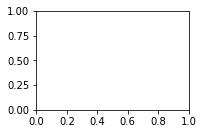

In [ ]:
plt.subplot(2,2,1)
sns.lineplot( x = 'data', y='faturamento', data = df9, label = 'REAL')
sns.lineplot( x = 'data', y='predições', data = df9, label = 'PREDITO')

plt.subplot(2,2,2)
sns.lineplot(x='data', y='error_rate', data=df9)

plt.subplot(2,2,3)
sns.displot( df9['error'])

plt.subplot(2,2,4)
sns.scatterplot( df9['predições'], df9['error'])

# 10 DEPLOY

# Para Ciclo 2

Fazer em jupyter notebook

realmente rodar o boruta

ter prints de tempo de execução

inserir equações das formulas usadas para calculo dos indicadores de resultados do modelo final

calcular rmpe para modelo